In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/ProAnalytics_G4/dataset_template_req/Insurance Dataset.rar", outdir="/content")

patool: Extracting /content/drive/MyDrive/ProAnalytics_G4/dataset_template_req/Insurance Dataset.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/ProAnalytics_G4/dataset_template_req/Insurance Dataset.rar"
patool:     with cwd='/content'


PatoolError: ignored

In [ ]:
#loading basic libraries for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading dataset in the environment
data= pd.read_csv(r"./Insurance Dataset.csv")

In [ ]:
data1=data.copy()
data1=data1.drop_duplicates().reset_index(drop=True)

In [ ]:
data1.iloc[:,7].unique().shape[0]

120

In [ ]:
d1=data1.iloc[:,7].values
d1=[v.replace(" +","") for v in d1]
data1.iloc[:,7]=d1
data1.iloc[:,7].unique().shape[0]

120

In [ ]:
data1.iloc[:,7].unique()

array(['4', '3', '1', '2', '5', '6', '14', '12', '9', '8', '10', '7',
       '22', '11', '16', '15', '25', '13', '17', '28', '18', '19', '23',
       '38', '20', '24', '26', '21', '27', '30', '29', '39', '87', '35',
       '37', '32', '55', '56', '49', '110', '69', '75', '42', '51', '47',
       '45', '46', '40', '34', '79', '43', '120', '65', '41', '31', '50',
       '59', '44', '36', '70', '115', '58', '94', '33', '68', '67', '54',
       '80', '85', '95', '78', '91', '88', '48', '52', '63', '57', '74',
       '64', '53', '62', '97', '72', '118', '81', '90', '86', '106',
       '112', '105', '114', '66', '89', '83', '84', '82', '93', '116',
       '71', '60', '73', '61', '92', '76', '96', '77', '104', '100',
       '103', '102', '117', '108', '99', '107', '98', '101', '119', '111',
       '109', '113'], dtype=object)

In [ ]:
data1.dropna(inplace=True)
data1.reset_index(drop=True,inplace=True)
data2=data1.copy()

In [ ]:
data2.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [ ]:
data2=data1.drop(["ccs_diagnosis_code","Hospital County","Area_Service","Hospital Id","Home or self care,","apr_drg_description","Mortality risk","Abortion","Emergency dept_yes/No","Tot_cost","Tot_charg","Weight_baby"],axis=1)

In [ ]:
data2.head()

,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,ccs_procedure_code,Code_illness,Surg_Description,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,30 to 49,F,White,Not Span/Hispanic,4,Elective,0,1,Medical,1.012798,1,1
1,70 or Older,F,White,Not Span/Hispanic,4,Urgent,0,3,Medical,1.079365,1,1
2,30 to 49,F,White,Not Span/Hispanic,3,Urgent,0,1,Medical,1.059379,1,1
3,0 to 17,F,White,Not Span/Hispanic,1,Urgent,0,1,Medical,1.484167,0,1
4,70 or Older,F,White,Not Span/Hispanic,3,Elective,0,2,Medical,0.986161,1,1


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 11 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Age                                    1041265 non-null  object 
 1   Gender                                 1041265 non-null  object 
 2   Cultural_group                         1041265 non-null  object 
 3   ethnicity                              1041265 non-null  object 
 4   Days_spend_hsptl                       1041265 non-null  object 
 5   Admission_type                         1041265 non-null  object 
 6   Code_illness                           1041265 non-null  int64  
 7   Surg_Description                       1041265 non-null  object 
 8   ratio_of_total_costs_to_total_charges  1041265 non-null  float64
 9   Result                                 1041265 non-null  int64  
 10  Payment_Typology                       104

In [ ]:
data2["Days_spend_hsptl"]=data2["Days_spend_hsptl"].astype("float")

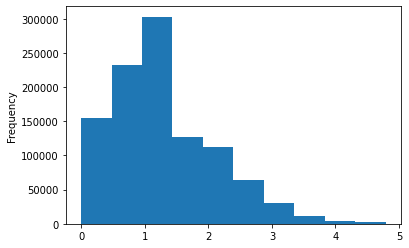

In [ ]:
np.log(data2['Days_spend_hsptl']).plot.hist()

In [ ]:
data2["Days_spend_hsptl"]=np.log(data2["Days_spend_hsptl"])

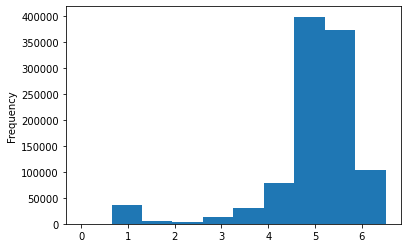

In [ ]:
#np.log(data2["ccs_diagnosis_code"]).plot.hist()  removed this column

In [ ]:
#data2["ccs_diagnosis_code"]=np.log(data2["ccs_diagnosis_code"]) removed this column

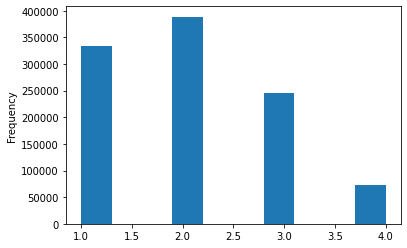

In [ ]:
(data2["Code_illness"]).plot.hist()  ### rank

In [ ]:
data2["Surg_Description"].value_counts()

Medical     799620
Surgical    241645
Name: Surg_Description, dtype: int64

In [ ]:
# creating dataset  categ nominal and removing it from main dataset
categ=pd.DataFrame(data2, columns=["Admission_type","Gender","Cultural_group","ethnicity","Surg_Description"])
data2.drop(["Admission_type","Gender","Cultural_group","ethnicity","Surg_Description"],axis=1,inplace=True)

In [ ]:
categ_encoded=pd.get_dummies(categ)


In [ ]:
categ_encoded.head()

,Admission_type_Elective,Admission_type_Emergency,Admission_type_Newborn,Admission_type_Not Available,Admission_type_Trauma,Admission_type_Urgent,Gender_F,Gender_M,Gender_U,Cultural_group_Black/African American,Cultural_group_Other Race,Cultural_group_Unknown,Cultural_group_White,ethnicity_Not Span/Hispanic,ethnicity_Spanish/Hispanic,ethnicity_Unknown,Surg_Description_Medical,Surg_Description_Surgical
0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0
2,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0
3,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0


In [ ]:
data2.head()

,Age,Days_spend_hsptl,ccs_procedure_code,Code_illness,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,30 to 49,1.386294,0,1,1.012798,1,1
1,70 or Older,1.386294,0,3,1.079365,1,1
2,30 to 49,1.098612,0,1,1.059379,1,1
3,0 to 17,0.000000,0,1,1.484167,0,1
4,70 or Older,1.098612,0,2,0.986161,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data2.iloc[:,0] = labelencoder.fit_transform(data2.iloc[:,1])

In [ ]:
data2.head()

,Age,Days_spend_hsptl,Code_illness,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,3,4.0,1,1.012798,1,1
1,3,4.0,3,1.079365,1,1
2,2,3.0,1,1.059379,1,1
3,0,1.0,1,1.484167,0,1
4,2,3.0,2,0.986161,1,1


In [ ]:
final_data=data2.join(categ_encoded)

In [ ]:
final_data.head()

,Age,Days_spend_hsptl,ccs_procedure_code,Code_illness,ratio_of_total_costs_to_total_charges,Result,Payment_Typology,Admission_type_Elective,Admission_type_Emergency,Admission_type_Newborn,Admission_type_Not Available,Admission_type_Trauma,Admission_type_Urgent,Gender_F,Gender_M,Gender_U,Cultural_group_Black/African American,Cultural_group_Other Race,Cultural_group_Unknown,Cultural_group_White,ethnicity_Not Span/Hispanic,ethnicity_Spanish/Hispanic,ethnicity_Unknown,Surg_Description_Medical,Surg_Description_Surgical
0,3,1.386294,0,1,1.012798,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
1,3,1.386294,0,3,1.079365,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0
2,2,1.098612,0,1,1.059379,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0
3,0,0.000000,0,1,1.484167,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0
4,2,1.098612,0,2,0.986161,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

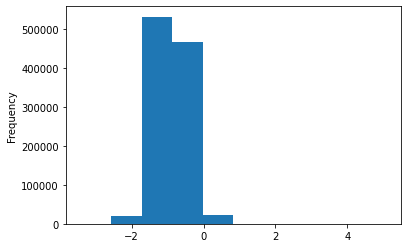

In [ ]:
np.log(final_data["ratio_of_total_costs_to_total_charges"]).plot.hist()

In [ ]:
final_data["ratio_of_total_costs_to_total_charges"]=np.log(final_data["ratio_of_total_costs_to_total_charges"])

In [ ]:
colname=final_data.columns
final_data=pd.DataFrame(scaler.fit_transform(final_data))
final_data.columns=colname

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 25 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Age                                    1041265 non-null  float64
 1   Days_spend_hsptl                       1041265 non-null  float64
 2   ccs_procedure_code                     1041265 non-null  float64
 3   Code_illness                           1041265 non-null  float64
 4   ratio_of_total_costs_to_total_charges  1041265 non-null  float64
 5   Result                                 1041265 non-null  float64
 6   Payment_Typology                       1041265 non-null  float64
 7   Admission_type_Elective                1041265 non-null  float64
 8   Admission_type_Emergency               1041265 non-null  float64
 9   Admission_type_Newborn                 1041265 non-null  float64
 10  Admission_type_Not Available           104

In [ ]:
final_data=final_data.astype("int32")
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 25 columns):
 #   Column                                 Non-Null Count    Dtype
---  ------                                 --------------    -----
 0   Age                                    1041265 non-null  int32
 1   Days_spend_hsptl                       1041265 non-null  int32
 2   ccs_procedure_code                     1041265 non-null  int32
 3   Code_illness                           1041265 non-null  int32
 4   ratio_of_total_costs_to_total_charges  1041265 non-null  int32
 5   Result                                 1041265 non-null  int32
 6   Payment_Typology                       1041265 non-null  int32
 7   Admission_type_Elective                1041265 non-null  int32
 8   Admission_type_Emergency               1041265 non-null  int32
 9   Admission_type_Newborn                 1041265 non-null  int32
 10  Admission_type_Not Available           1041265 non-null  int32
 11

In [ ]:
final_data.drop(["Gender_U"],axis=1,inplace=True)

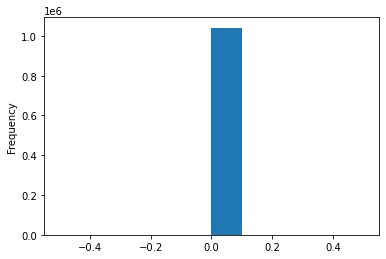

In [ ]:
final_data['ratio_of_total_costs_to_total_charges'].plot.hist()

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041265 entries, 0 to 1041264
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype
---  ------                                 --------------    -----
 0   Age                                    1041265 non-null  int32
 1   Days_spend_hsptl                       1041265 non-null  int32
 2   ccs_procedure_code                     1041265 non-null  int32
 3   Code_illness                           1041265 non-null  int32
 4   ratio_of_total_costs_to_total_charges  1041265 non-null  int32
 5   Result                                 1041265 non-null  int32
 6   Payment_Typology                       1041265 non-null  int32
 7   Admission_type_Elective                1041265 non-null  int32
 8   Admission_type_Emergency               1041265 non-null  int32
 9   Admission_type_Newborn                 1041265 non-null  int32
 10  Admission_type_Not Available           1041265 non-null  int32
 11

In [ ]:

predictors=list(final_data.columns)
target=predictors.pop(5)
target

'Result'

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_data[predictors],
                                                     final_data[target],
                                                    test_size=0.4, random_state=10)

In [ ]:
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((624759, 23), (624759,), (416506, 23), (416506,))

In [ ]:
x_train.dropna(inplace=True),y_train.dropna(inplace=True)


(None, None)

In [ ]:
y_test.value_counts(dropna=False)

1    311967
0    104539
Name: Result, dtype: int64

In [ ]:
from xgboost import XGBClassifier
model= XGBClassifier()
model.fit(x_train,y_train)
result = model.score(x_test, y_test)
print(result)

0.7489880097765699


In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 5)
x_train_res, y_train_res = sm.fit_sample(x_train,y_train)

x_test_res,y_test_res = sm.fit_sample(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_train_res.shape,y_train_res.shape, x_test_res.shape,y_test_res.shape

In [ ]:
from xgboost import XGBClassifier
model= XGBClassifier()
model.fit(x_train_res,y_train_res)
print(model.score(x_test_res,y_test_res))

0.5373068333648402


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression(max_iter=700)
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=700,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(x_test,y_test)

0.7490096181087428

In [ ]:
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression(max_iter=500)
model.fit(x_train_res,y_train_res)

In [ ]:
model.score(x_test_res,y_test_res)


0.5011006052527868

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(input_dim = 22, units=50, activation = 'relu'))    #adding input layer
model.add(Dense(units =30 , activation = 'relu'))                  #adding 1st hidden layer
model.add(Dropout(0.5))                                            #adding droupout layer
model.add(Dense(units = 15, activation = 'relu'))                  #adding 2nd hidden layer
model.add(Dropout(0.5))                   
model.add(Dense(units = 15, activation = 'relu'))                  #adding 4th hidden layer
model.add(Dropout(0.5))                                            #adding dropout layer
model.add(Dense(units = 30, activation = 'relu'))                  #adding 5th hidden layer
model.add(Dropout(0.5))                                            #adding dropout layer
model.add(Dense(units = 1, activation = 'sigmoid'))                #adding output layer
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 50)                1150      
_________________________________________________________________
dense_25 (Dense)             (None, 30)                1530      
_________________________________________________________________
dropout_16 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_17 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_18 (Dropout)         (None, 15)               

In [ ]:

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size =5 , epochs = 3)

Epoch 1/3
124952/124952 [==============================] - 202s 2ms/step - loss: 0.5652 - accuracy: 0.7499
Epoch 2/3
 21572/124952 [====>.........................] - ETA: 2:40 - loss: 0.5660 - accuracy: 0.7467

KeyboardInterrupt: ignored

In [ ]:
model_score = model.evaluate(x_test, y_test)
print(model_score)

13016/13016 [==============================] - 13s 997us/step - loss: 0.5635 - accuracy: 0.7490
[0.5634793043136597, 0.7490096092224121]


Isolation Forest Algoritmn

In [ ]:
final_data1=final_data.sample(frac=0.1,random_state=10)
final_data1.shape

(104126, 25)

In [ ]:
final_data1.head()

,Age,Days_spend_hsptl,ccs_diagnosis_code,Code_illness,ratio_of_total_costs_to_total_charges,Result,Payment_Typology,Admission_type_Elective,Admission_type_Emergency,Admission_type_Newborn,Admission_type_Not Available,Admission_type_Trauma,Admission_type_Urgent,Gender_F,Gender_M,Gender_U,Cultural_group_Black/African American,Cultural_group_Other Race,Cultural_group_Unknown,Cultural_group_White,ethnicity_Not Span/Hispanic,ethnicity_Spanish/Hispanic,ethnicity_Unknown,Surg_Description_Medical,Surg_Description_Surgical
192527,0.000000,0.000000,0.997689,0.000000,0.004546,1.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
53032,0.016807,0.229476,0.827457,0.000000,0.002744,1.0,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
543894,0.016807,0.229476,0.591668,0.000000,0.002090,1.0,0.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
754372,0.008403,0.144783,0.827457,0.000000,0.000854,1.0,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
212926,0.016807,0.229476,0.679061,0.666667,0.002400,1.0,0.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
Fraud=final_data1[final_data1["Result"]==1]
Valid=final_data1[final_data1["Result"]==0]
outlier_fraction=len(Fraud)/float(len(Valid))

In [ ]:
print("Fraud_Class:",len(Fraud))
print("\nValid_Class:",len(Valid))
print("\n Outlier:",outlier_fraction)

Fraud_Class: 78091

Valid_Class: 26035

 Outlier: 2.9994622623391587


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
model=IsolationForest(n_estimators=100,contamination=3,random_state=10,verbose=1)

In [ ]:
final_data[predictors].head()

,Age,Days_spend_hsptl,ccs_diagnosis_code,Code_illness,ratio_of_total_costs_to_total_charges,Payment_Typology,Admission_type_Elective,Admission_type_Emergency,Admission_type_Newborn,Admission_type_Not Available,Admission_type_Trauma,Admission_type_Urgent,Gender_F,Gender_M,Gender_U,Cultural_group_Black/African American,Cultural_group_Other Race,Cultural_group_Unknown,Cultural_group_White,ethnicity_Not Span/Hispanic,ethnicity_Spanish/Hispanic,ethnicity_Unknown,Surg_Description_Medical,Surg_Description_Surgical
0,0.025210,0.289566,0.738254,0.000000,0.006219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.025210,0.289566,0.811892,0.666667,0.006642,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.016807,0.229476,0.738254,0.000000,0.006515,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.000000,0.738254,0.000000,0.009211,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.016807,0.229476,0.738254,0.333333,0.006050,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
model.fit(final_data[predictors],final_data[target])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s finished


ValueError: ignored

In [ ]:
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1
n_errors= (y_pred!=final[target]).sum()
print("errors:",n_errors)

In [ ]:
print("Accuracy_score:")
print(accuracy_score(final[target],y_pred))

In [ ]:
print(classification_report(final_data[target],y_pred))

# LGBM

In [ ]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [ ]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [ ]:
clf = lgb.train(params, d_train, 100)

In [ ]:
#Prediction
y_pred=clf.predict(x_test)

In [ ]:
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)


In [ ]:
print(accuracy)

0.7490096181087428
